In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
all_data = pd.merge(clinical_trial_data, mouse_drug_data, how='inner', on='Mouse ID')

# Display the data table for preview
#Sorts on the category "Timepoint" in descending order
all_data = all_data.sort_index(by=['Timepoint'], ascending=['False'])
#formats the decimal place
all_data['Tumor Volume (mm3)'] = all_data['Tumor Volume (mm3)'].map('{:,.1f}'.format)
all_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1535,i635,0,45.0,0,Propriva
565,g791,0,45.0,0,Ramicane
1545,w746,0,45.0,0,Propriva
1547,r107,0,45.0,0,Propriva


## Tumor Response to Treatment

In [2]:
#converting data type for mean function
all_data['Tumor Volume (mm3)'] = pd.to_numeric(all_data['Tumor Volume (mm3)'])

#Grouping data and getting mean of "Tumor Volume" data
TumMean = pd.DataFrame(all_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean())

#Displaying data
TumMean

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.268000
          10                  43.080000
          15                  42.066667
          20                  40.717391
          25                  39.945455
          30                  38.781818
          35                  37.822727
          40                  36.961905
          45                  36.233333
Ceftamin  0                   45.000000
          5                   46.504762
          10                  48.290000
          15                  50.089474
          20                  52.150000
          25                  54.288889
          30                  56.762500
          35                  58.828571
          40                  61.471429
          45                  64.115385
Infubinol 0                   45.000000
          5                   47.076000
          10                  49.409524
          15                  51.290476
          20                  53.195000
          25                  55.722222
          30                  58.300000
          35                  60.725000
          40                  63.160000
          45                  65.755556
...                                 ...
Ramicane  0                   45.000000
          5                   43.948000
          10                  42.533333
          15                  41.495833
          20                  40.234783
          25                  38.978261
          30                  38.700000
          35                  37.447619
          40                  36.585000
          45                  34.960000
Stelasyn  0                   45.000000
          5                   47.528000
          10                  49.465217
          15                  51.534783
          20                  54.076190
          25                  56.163158
          30                  59.827778
          35                  62.443750
          40                  65.358333
          45                  68.436364
Zoniferol 0                   45.000000
          5                   46.850000
          10                  48.686364
          15                  50.780952
          20                  53.170588
          25                  55.450000
          30                  57.713333
          35                  60.085714
          40                  62.914286
          45                  65.957143

[100 rows x 1 columns]

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint in dataframe
st_err = pd.DataFrame(all_data.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)'])

#preview
st_err.head()



Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.449137
          10                   0.704036
          15                   0.837107
          20                   0.908820

In [4]:
#makes lists out of mean values in "Tumor Volume" for each treatment
c_mean = TumMean.loc['Capomulin']['Tumor Volume (mm3)'].tolist()
i_mean = TumMean.loc['Infubinol']['Tumor Volume (mm3)'].tolist()
k_mean = TumMean.loc['Ketapril']['Tumor Volume (mm3)'].tolist()
p_mean = TumMean.loc['Placebo']['Tumor Volume (mm3)'].tolist()

#makes lists out of standard error values in "Tumor Volume" for each treatment
c_sem = st_err.loc['Capomulin']['Tumor Volume (mm3)'].tolist()
i_sem = st_err.loc['Infubinol']['Tumor Volume (mm3)'].tolist()
k_sem = st_err.loc['Ketapril']['Tumor Volume (mm3)'].tolist()
p_sem = st_err.loc['Placebo']['Tumor Volume (mm3)'].tolist()

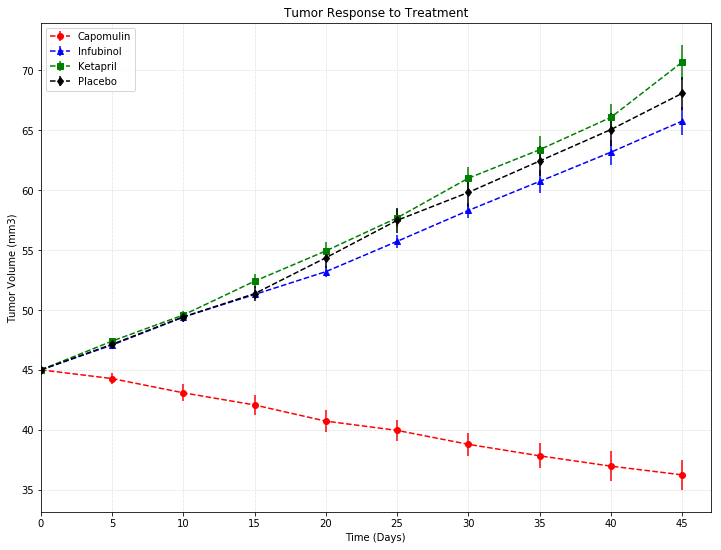

In [5]:
# Generate the Plot (with Error Bars)
plt.figure(figsize= (12, 9))
plt.title('Tumor Response to Treatment')
plt.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)
#sets limits for the x-axis and inserts labels/tic-marks
xrange = np.arange(0, 50, 5)
plt.xlabel('Time (Days)')
plt.xticks(xrange)
plt.xlim(0, 47)

#labels y axis
plt.ylabel('Tumor Volume (mm3)')

#setup error bars    
plt.errorbar(xrange, c_mean, yerr= c_sem, color='red', linestyle='--', label='Capomulin', marker = "o")
plt.errorbar(xrange, i_mean, yerr= i_sem, color='blue', linestyle='--', label='Infubinol', marker = "^")
plt.errorbar(xrange, k_mean, yerr= k_sem, color='green', linestyle='--', label='Ketapril', marker = "s")
plt.errorbar(xrange, p_mean, yerr= p_sem, color='black', linestyle='--', label='Placebo', marker = "d")

#plotting legend on clearest area of graph
plt.legend(loc='best')


# Save the Figure
plt.savefig("analysis/Tumor_Response.png")

plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

#converting data type for mean function
all_data['Metastatic Sites'] = pd.to_numeric(all_data['Metastatic Sites'])

#Grouping data and getting mean of "Metastatic Sites" data
MetaMean = pd.DataFrame(all_data.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean())


# Preview DataFrame
MetaMean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

MetaErr = pd.DataFrame(all_data.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites'])

#preview
MetaErr.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
#makes lists out of mean values in "Tumor Volume" for each treatment
c_metmean = MetaMean.loc['Capomulin']['Metastatic Sites'].tolist()
i_metmean = MetaMean.loc['Infubinol']['Metastatic Sites'].tolist()
k_metmean = MetaMean.loc['Ketapril']['Metastatic Sites'].tolist()
p_metmean = MetaMean.loc['Placebo']['Metastatic Sites'].tolist()

#makes lists out of standard error values in "Tumor Volume" for each treatment
c_metsem = MetaErr.loc['Capomulin']['Metastatic Sites'].tolist()
i_metsem = MetaErr.loc['Infubinol']['Metastatic Sites'].tolist()
k_metsem = MetaErr.loc['Ketapril']['Metastatic Sites'].tolist()
p_metsem = MetaErr.loc['Placebo']['Metastatic Sites'].tolist()

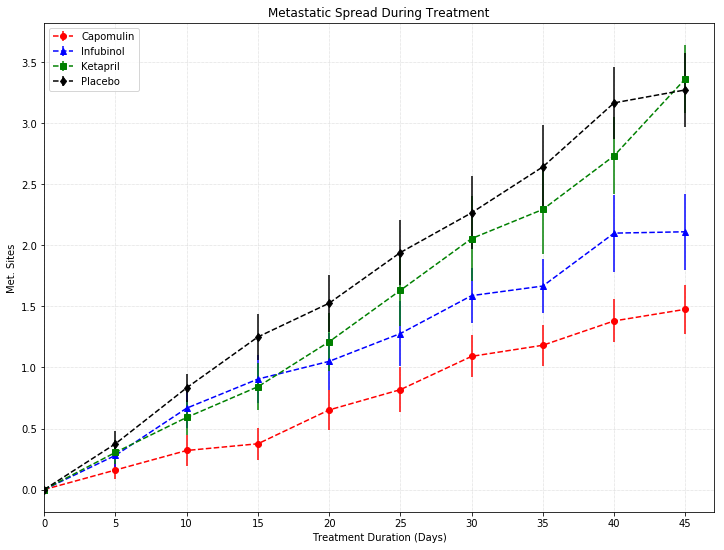

In [9]:
# Generate the Plot (with Error Bars)
plt.figure(figsize= (12, 9))
plt.title('Metastatic Spread During Treatment')
plt.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

#sets limits for the x-axis and inserts labels/tic-marks
plt.xlabel('Treatment Duration (Days)')
plt.xticks(xrange)
plt.xlim(0, 47)

#labels y axis
plt.ylabel('Met. Sites')

#setup error bars    
plt.errorbar(xrange, c_metmean, yerr= c_metsem, color ='red', linestyle='--', label='Capomulin', marker = "o")
plt.errorbar(xrange, i_metmean, yerr= i_metsem, color='blue', linestyle='--', label='Infubinol', marker = "^")
plt.errorbar(xrange, k_metmean, yerr= k_metsem, color='green', linestyle='--', label='Ketapril', marker = "s")
plt.errorbar(xrange, p_metmean, yerr= p_metsem, color='black', linestyle='--', label='Placebo', marker = "d")

#plotting legend in clearest area on graph
plt.legend(loc='best')

# Save the Figure
plt.savefig("analysis/Metastatic_Spread.png")

plt.show()

## Survival Rates

In [10]:
# Stores count of surviving mice at each timepoint
mouse_count = all_data.groupby(['Drug', 'Timepoint'])['Timepoint'].count()

#converts count to dataframe
mouse_count = pd.DataFrame({"Mouse Count": mouse_count})
mouse_count.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [11]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count = mouse_count.reset_index()
mouse_count = mouse_count.pivot(index="Timepoint", columns="Drug")['Mouse Count']
# Preview the Data Frame
mouse_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


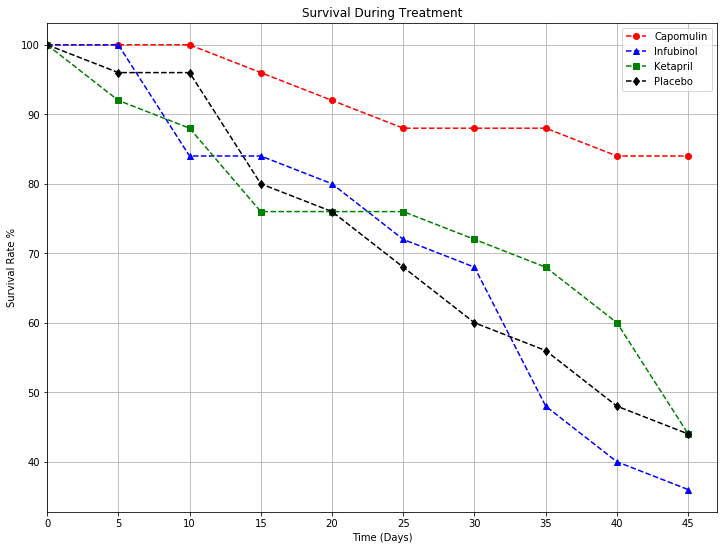

In [12]:
# Generate the Plot (Accounting for percentages)

#setup plot formatting
plt.figure(figsize= (12, 9))
plt.title('Survival During Treatment')
plt.grid(True)

#sets limits for the x-axis and inserts labels/tic-marks
plt.xlabel('Time (Days)')
plt.xticks(xrange)
plt.xlim(0, 47)

#labels y axis
plt.ylabel('Survival Rate %')


# plottting the percentage of mouse survivors over the course of the treatment
plt.plot(xrange, mouse_count["Capomulin"]/25*100, "ro", linestyle='--', label= 'Capomulin')
plt.plot(xrange, mouse_count["Infubinol"]/25*100, "b^", linestyle='--', label= 'Infubinol')
plt.plot(xrange, mouse_count["Ketapril"]/25*100, "gs", linestyle='--', label= 'Ketapril')
plt.plot(xrange, mouse_count["Placebo"]/25*100, "kd", linestyle='--', label= 'Placebo')
plt.legend(loc="best")

# Save the Figure
plt.savefig("analysis/Treatment_Survival.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug

#Sets the index back to the numerical default
TumMean = TumMean.reset_index()
#sorts data around timepoint to set the array up chronologically
TumVol = TumMean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
#applies percentage change using the values in the first [0] and last [-1] places in the volume array
PerChg = (TumVol.iloc[-1] - TumVol.iloc[0]) / TumVol.iloc[0] * 100
PerChg

Drug
Capomulin   -19.481481
Ceftamin     42.478632
Infubinol    46.123457
Ketapril     57.050505
Naftisol     53.948718
Placebo      51.272727
Propriva     47.269841
Ramicane    -22.311111
Stelasyn     52.080808
Zoniferol    46.571429
dtype: float64

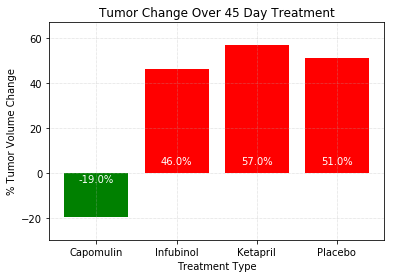

In [14]:
# Store all Relevant Percent Changes into a Tuple
select_PerChg = (PerChg['Capomulin'], PerChg['Infubinol'], PerChg['Ketapril'], PerChg['Placebo'])


# Orient widths. Add labels, tick marks, etc. 
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Treatment Type")
plt.ylabel("% Tumor Volume Change")
plt.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
x_axis = np.arange(len(select_PerChg))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels)


# Use functions to label the percentages of changes
plt.ylim(min(select_PerChg)-10, max(select_PerChg)+10)

# Call functions to implement the function calls
plt.bar(x_axis, select_PerChg, color = ['green' if select_PerChg[r] < 0 else 'red' for r in x_axis])

#count for x coordinate location of value label
counter = 0

#loop to add percentage change labels
for i in select_PerChg:
    if i < 0:
        y_coor = -4 #arbitrary number to place text below horizontal line
    else:
        y_coor = 4 #places text above horizontal line
    plt.text(counter, y_coor, str(round(i, 0)) + '%', ha = 'center', color = 'white')
    counter += 1

# Save the Figure
plt.savefig("analysis/Tumor_Change.png")

# Show the Figure
plt.show()